# Explore the extrapolated gain from WVR data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_series_by_dict(a, d):

    v = np.array(list(d.values()))
    k = np.array(list(d.keys()))
    sidx = k.argsort()
    out_ar = v[sidx[np.searchsorted(k,a,sorter=sidx)]]
    return out_ar

#### Import the data

In [3]:
Dir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/'
picDir = Dir+'pictures/'
# Tsys 
filename_Tsys = 'Tsys_WVR_matched_avgtime10.pkl'
with open(filename_Tsys, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')

# gain table 
filename_gain = 'WVR_gaintable_chanWVR1_avgtime10.pkl'
with open(filename_gain, 'rb') as pickle_file:
    WVR_table = pickle.load(pickle_file, encoding='latin')
print(WVR_table.keys())

dict_keys(['info', 'WVR_time', 'WVR_norm', 'Tsys_start', 'WVR_data', 'scan', 'Tsys_orig', 'iant', 'field', 'obs_type', 'Tsys_norm', 'Tsys_ext'])


Import the gain table

In [4]:
## data from the Tsys table
iants_Tsys = Tsys_table['iant']
Tsys = Tsys_table['Tsys']
Tsys_time = Tsys_table['time_Tsys']
dur_Tsys = Tsys_table['dur_Tsys']
Tsys_spws = Tsys_table['info']['Tsys spw']

## data from WVR gain table
iants_WVR = WVR_table['iant']
Tsys_ext = WVR_table['Tsys_ext']
WVR_time = WVR_table['WVR_time']
obsTypes_WVR = WVR_table['obs_type']
Tsys_norm = WVR_table['Tsys_norm']

#### Plot the gain versus time

Text(0.5, 0.93, 'uid___A002_Xdb7ab7_X1880b, band8')

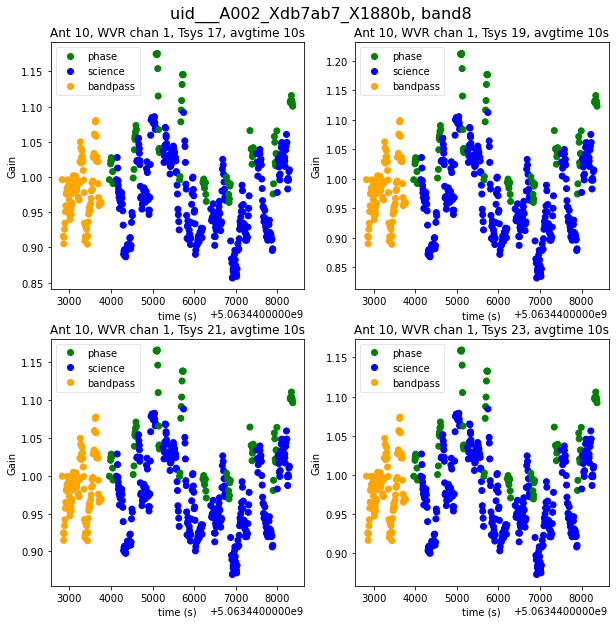

In [5]:
iant_id = 10
Tsys_norm_sinant = Tsys_norm[np.where(iants_WVR==iant_id)]
WVR_time_sinant = WVR_time[np.where(iants_WVR==iant_id)]
obsTypes_WVR_sinant = obsTypes_WVR[np.where(iants_WVR==iant_id)]

Tsys_orig_sinant = Tsys[np.where(iants_Tsys==iant_id)]
Tsys_time_sinant = Tsys_time[np.where(iants_Tsys==iant_id)]

fig = plt.figure(figsize=(10,10))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    sc = plt.scatter(WVR_time_sinant, Tsys_norm_sinant[:,i], c=map_series_by_dict(obsTypes_WVR_sinant, color_dict))
    plt.ylabel('Gain')
    plt.xlabel('time (s)')

    plt.title('Ant '+str(iant_id)+', WVR chan 1, Tsys '+str(Tsys_spws[i])+', avgtime 10s')
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)
    
fig.suptitle('uid___A002_Xdb7ab7_X1880b, band8', fontsize=16, y=0.93)
# plt.savefig(picDir+'band7/Tsys_WVR_correlaltoin'+keywords_filename)

#### Plot the extrapolated Tsys from the gain

Pick out the data for a single antenna

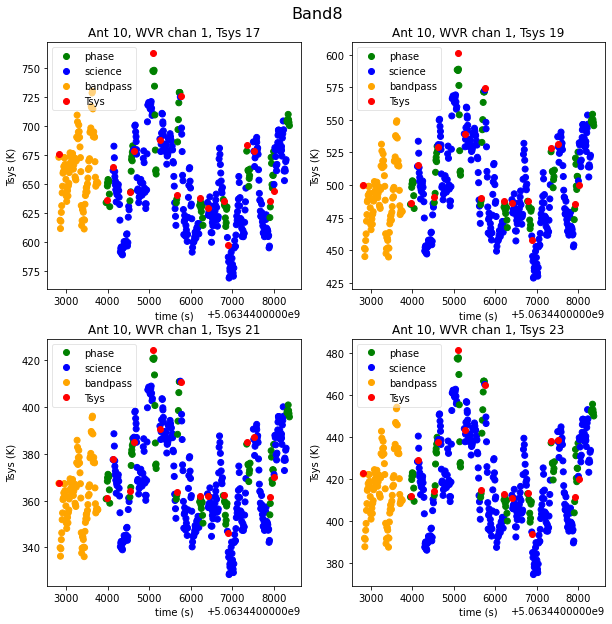

In [6]:
iant_id = 10
Tsys_ext_sinant = Tsys_ext[np.where(iants_WVR==iant_id)]
WVR_time_sinant = WVR_time[np.where(iants_WVR==iant_id)]
obsTypes_WVR_sinant = obsTypes_WVR[np.where(iants_WVR==iant_id)]

Tsys_orig_sinant = Tsys[np.where(iants_Tsys==iant_id)]
Tsys_time_sinant = Tsys_time[np.where(iants_Tsys==iant_id)]

fig = plt.figure(figsize=(10,10))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange', 'Tsys':'red'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    sc = plt.scatter(WVR_time_sinant, Tsys_ext_sinant[:,i], c=map_series_by_dict(obsTypes_WVR_sinant, color_dict))
    plt.ylabel('Tsys (K)')
    plt.xlabel('time (s)')

    plt.scatter(Tsys_time_sinant, Tsys_orig_sinant[:,i], color='red')
    plt.title('Ant '+str(iant_id)+', WVR chan 1'+', Tsys '+str(Tsys_spws[i]))
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)

fig.suptitle('Band8', fontsize=16, y=0.93)
plt.savefig(picDir+'2018.1.01778.S/Tsys_WVR_extrapolate.pdf', bbox_inches='tight', pad_inches=0)